/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Evaluating Logistic Regression
Accuracy: 0.9023, Precision: 0.7817, Recall: 0.5474, F1 Score: 0.6439, AUC: 0.76

Evaluating KNN
Accuracy: 0.8988, Precision: 0.8020, Recall: 0.4954, F1 Score: 0.6125, AUC: 0.74

Evaluating Decision Tree
Accuracy: 0.9304, Precision: 0.7870, Recall: 0.7798, F1 Score: 0.7834, AUC: 0.87

Evaluating Naive Bayes
Accuracy: 0.8801, Precision: 0.6364, Recall: 0.5994, F1 Score: 0.6173, AUC: 0.77

Evaluating LightGBM
[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705
Ac

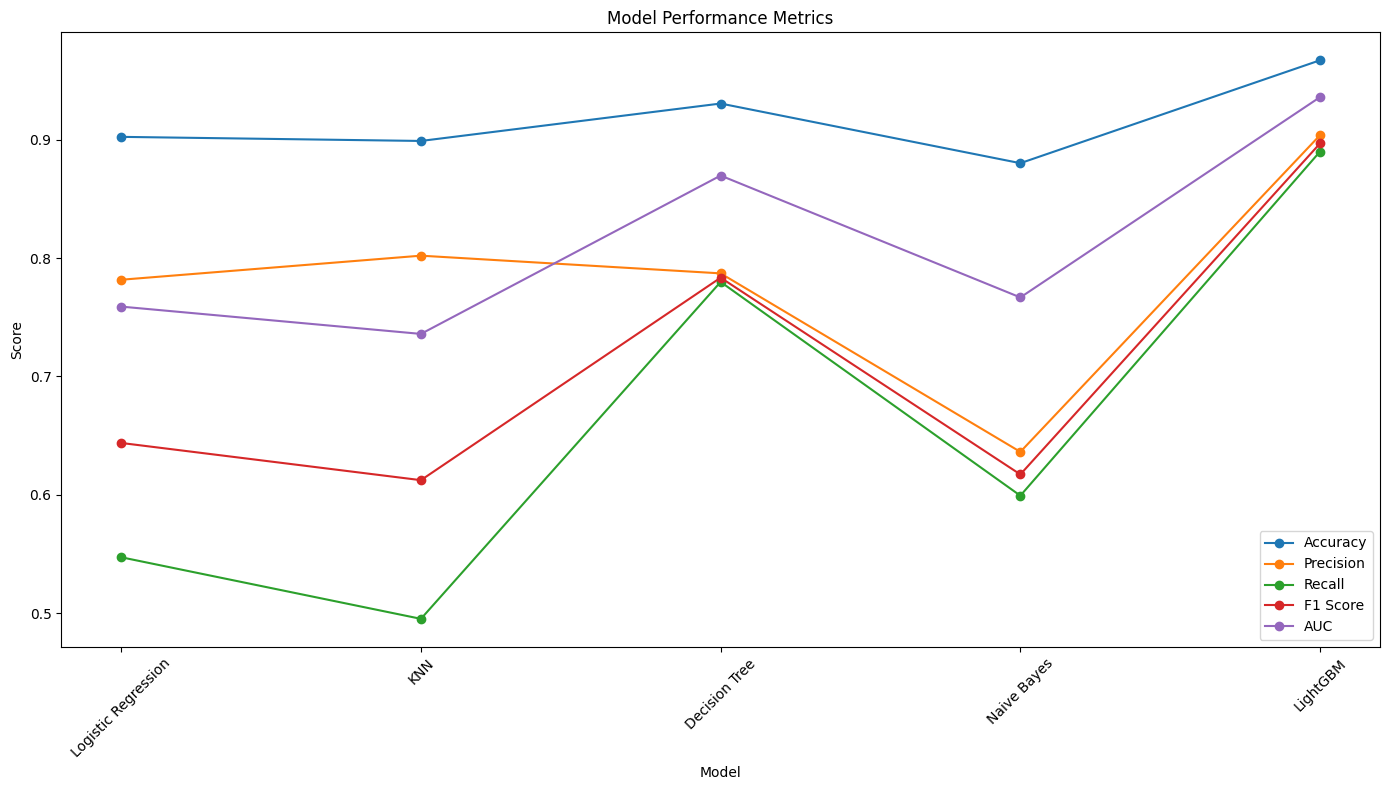


SHAP Analysis for LightGBM Model
[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


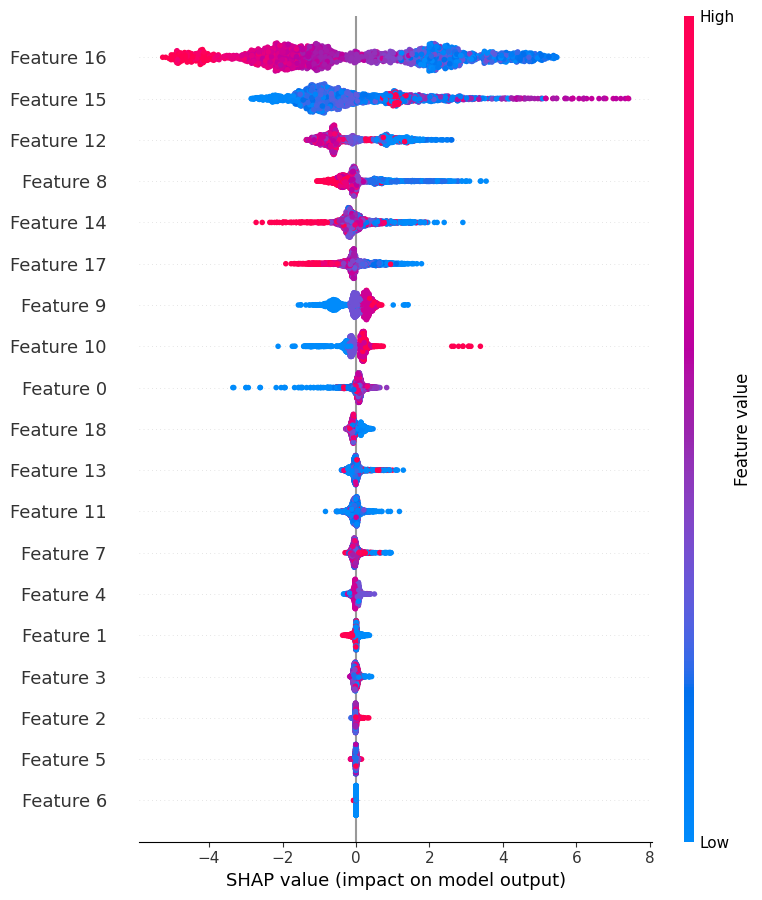

In [1]:
# 논문2 구현_Understanding Telecommunication Customer Churn Insights from LightGBM Predictive Modelling and SHAP Feature Interpretation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import shap
import matplotlib.pyplot as plt

# 데이터셋 불러오기
file_path = '/content/BankChurners.csv'
df = pd.read_csv(file_path)

# 데이터 전처리

# Naive Bayes 관련 열 제거
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

# 불필요한 열 제거 ('CLIENTNUM')
df.drop(columns=['CLIENTNUM'], inplace=True)

# 범주형 변수를 수치형으로 매핑
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['Education_Level'] = df['Education_Level'].map({
    'Unknown':0, 'Uneducated': 1, 'High School': 2, 'College': 3,
    'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6
})
df['Marital_Status'] = df['Marital_Status'].map({'Unknown':0, 'Single': 1, 'Married': 2, 'Divorced': 3})
df['Income_Category'] = df['Income_Category'].map({'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3,
                                                   '$80K - $120K': 4, '$120K +': 5})
df['Card_Category'] = df['Card_Category'].map({'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4})


# 목표 변수와 특성 변수 분리
target_column = 'Attrition_Flag'
X = df.drop(target_column, axis=1)
y = df[target_column]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(C=1.2, penalty='l2', solver='liblinear'),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42),
    'Naive Bayes': GaussianNB(),
    'LightGBM': LGBMClassifier(learning_rate=0.1, max_depth=-5, num_leaves=31, random_state=42)
}

# 결과 저장을 위한 리스트
results = []

# 각 모델에 대해 평가 수행
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 평가 결과 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.2f}")
    results.append((model_name, accuracy, precision, recall, f1, auc))

# 결과를 데이터프레임으로 변환
evaluation_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# 데이터프레임을 사용자에게 표시
evaluation_df = evaluation_df.set_index('Model')
print(evaluation_df)

# 결과 시각화
plt.figure(figsize=(14, 8))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    plt.plot(evaluation_df.index, evaluation_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SHAP 분석 예시 (LightGBM 모델 사용)
print("\nSHAP Analysis for LightGBM Model")
model = LGBMClassifier(learning_rate=0.1, max_depth=-5, num_leaves=31, random_state=42)
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 특성 중요도 시각화
shap.summary_plot(shap_values, X_test)